In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [4]:
my_data_dir = 'C:\\Users\\Rameshwar\\OneDrive\\Desktop\\cell_images'

In [5]:
os.listdir(my_data_dir) 

['test', 'train']

In [6]:
test_path = my_data_dir+'\\test\\'
train_path = my_data_dir+'\\train\\'

In [7]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [8]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [9]:
os.listdir(train_path+'\\parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [10]:
para_cell = train_path+'\\parasitized'+'\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [11]:
para_img= imread(para_cell)

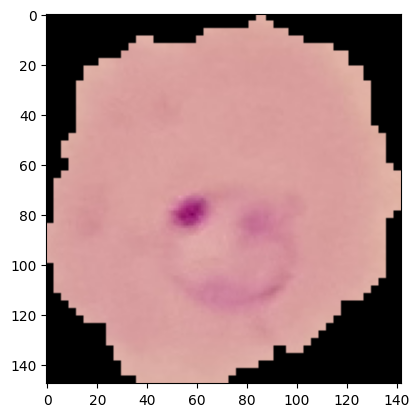

In [12]:
plt.imshow(para_img)

In [13]:
para_img.shape

(148, 142, 3)

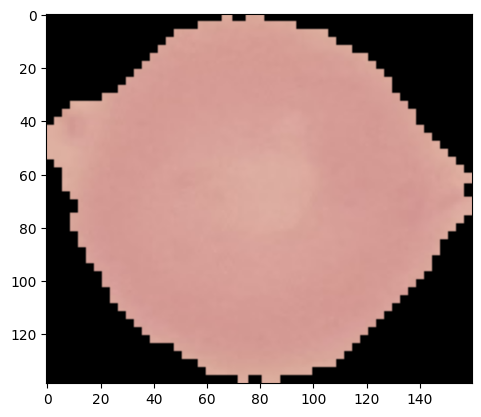

In [14]:
unifected_cell_path = train_path+'\\uninfected\\'+os.listdir(train_path+'\\uninfected')[0]
unifected_cell = imread(unifected_cell_path)
plt.imshow(unifected_cell)

In [15]:
len(os.listdir(train_path+'\\parasitized'))

12480

In [16]:
len(os.listdir(train_path+'\\uninfected'))

9023

In [17]:
unifected_cell.shape

(139, 160, 3)

In [18]:
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'\\uninfected'):
    
    img = imread(test_path+'\\uninfected'+'\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

<Axes: >

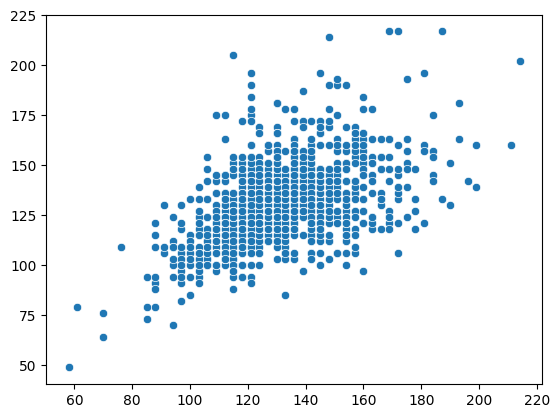

In [19]:
sns.scatterplot(x=dim1, y=dim2)

In [20]:
np.mean(dim1)

130.92538461538462

In [21]:
np.mean(dim2)

130.75

In [22]:
image_shape=(130,130,3)

**Image Manipulation**

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module keras.src.legacy.preprocessing.image:

class ImageDataGenerator(builtins.object)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, interpolation_order=1, dtype=None)
 |
 |  DEPRECATED.
 |
 |  Methods defined here:
 |
 |  __init__(self, featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=

In [25]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

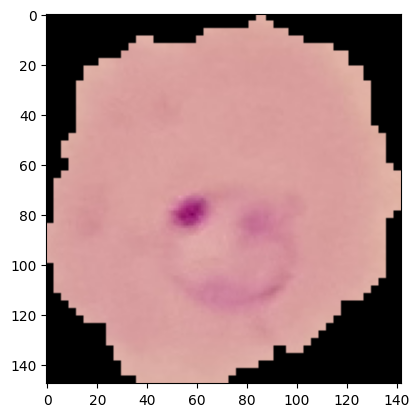

In [26]:
plt.imshow(para_img)

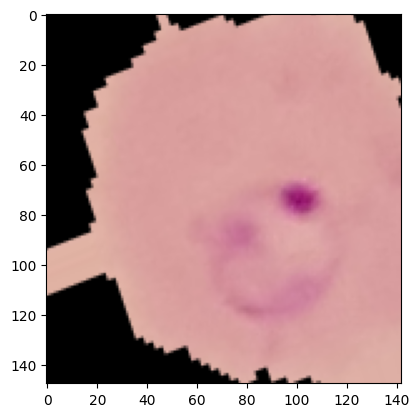

In [27]:
plt.imshow(image_gen.random_transform(para_img))

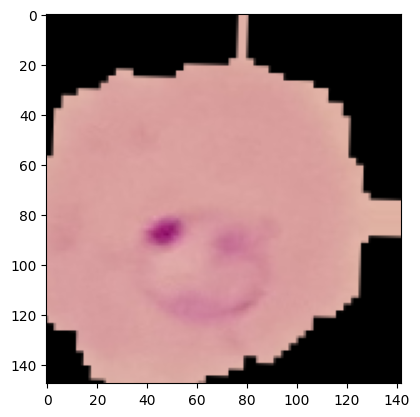

In [28]:
plt.imshow(image_gen.random_transform(para_img))

In [29]:
image_gen.flow_from_directory(train_path)

Found 21502 images belonging to 2 classes.


In [30]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


**Creating the Model**

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [32]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))


model.add(Dropout(0.5))


model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

c:\Users\Rameshwar\OneDrive\Desktop\CNN_PROJECT\cnnenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,662,209 (6.34 MB)

 Trainable params: 1,662,209 (6.34 MB)

 Non-trainable params: 0 (0.00 B)

**Early Stopping**

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

**Training the Model**

In [36]:
help(image_gen.flow_from_directory)

Help on method flow_from_directory in module keras.src.legacy.preprocessing.image:

flow_from_directory(directory, target_size=(256, 256), color_mode='rgb', classes=None, class_mode='categorical', batch_size=32, shuffle=True, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest', keep_aspect_ratio=False) method of keras.src.legacy.preprocessing.image.ImageDataGenerator instance



In [37]:
batch_size = 16

In [38]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 21502 images belonging to 2 classes.


In [39]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [40]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [41]:
import warnings
warnings.filterwarnings('ignore')

In [42]:
results = model.fit(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/20
1344/1344 ━━━━━━━━━━━━━━━━━━━━ 368s 272ms/step - accuracy: 0.7730 - loss: 0.4749 - val_accuracy: 0.9392 - val_loss: 0.2003
Epoch 2/20
1344/1344 ━━━━━━━━━━━━━━━━━━━━ 255s 189ms/step - accuracy: 0.9441 - loss: 0.1756 - val_accuracy: 0.9423 - val_loss: 0.1862
Epoch 3/20
1344/1344 ━━━━━━━━━━━━━━━━━━━━ 177s 131ms/step - accuracy: 0.9455 - loss: 0.1687 - val_accuracy: 0.9265 - val_loss: 0.2205
Epoch 4/20
1344/1344 ━━━━━━━━━━━━━━━━━━━━ 182s 135ms/step - accuracy: 0.9512 - loss: 0.1524 - val_accuracy: 0.9446 - val_loss: 0.1560
Epoch 5/20
1344/1344 ━━━━━━━━━━━━━━━━━━━━ 171s 127ms/step - accuracy: 0.9542 - loss: 0.1447 - val_accuracy: 0.9408 - val_loss: 0.1740
Epoch 6/20
1344/1344 ━━━━━━━━━━━━━━━━━━━━ 175s 130ms/step - accuracy: 0.9502 - loss: 0.1547 - val_accuracy: 0.9435 - val_loss: 0.1752


In [43]:
from tensorflow.keras.models import load_model
model.save('malaria_detector.h5')

**Evaluating the Model**

In [44]:
losses = pd.DataFrame(model.history.history)

<Axes: >

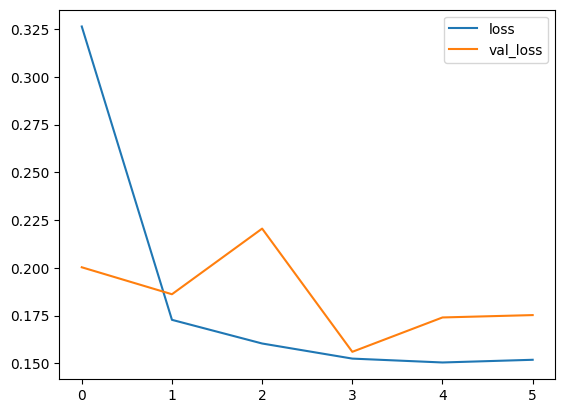

In [45]:
losses[['loss','val_loss']].plot()

In [46]:
model.metrics_names

['loss', 'compile_metrics']

In [48]:
model.evaluate(test_image_gen)

163/163 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - accuracy: 0.9439 - loss: 0.1650


[0.17689497768878937, 0.944615364074707]

In [49]:
from tensorflow.keras.preprocessing import image

In [51]:
pred_probabilities = model.predict(test_image_gen)

163/163 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step


In [52]:
pred_probabilities

array([[1.4579154e-05],
       [3.0211345e-06],
       [8.2481594e-05],
       ...,
       [9.9547577e-01],
       [9.9692261e-01],
       [9.9727839e-01]], dtype=float32)

In [53]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [70]:
predictions = pred_probabilities > 0.9

In [71]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [72]:
from sklearn.metrics import classification_report,confusion_matrix

In [73]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1300
           1       0.97      0.87      0.92      1300

    accuracy                           0.92      2600
   macro avg       0.93      0.92      0.92      2600
weighted avg       0.93      0.92      0.92      2600



In [74]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1269,   31],
       [ 168, 1132]], dtype=int64)